# Dados Brutos

In [2]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
pd.set_option('display.max_columns', None)

def extract_text_between_quotes(string):
    pattern = r"'(.*?)'"
    matches = re.findall(pattern, string)
    return matches

In [4]:
dados = pd.read_csv('State_of_data_2022.csv')

Perguntas possíveis:

Dados Gerais
- idade
- gênero
- ensino / formação acadêmica

Carreira
- modo de trabalho (remoto, presencial, híbrido)

Satisfação (opcional)
- satisfação / insatisfação
- motivos da insatisfação (gráfico comparativo barras)

Densidade geográfica
- Densidade de profissionais por estado
- Densidade de profissionais por gênero
- Densidade de profissionais por raça
- Densidade de profissionais pcd

Salário
- geral
- por cargo
- por tempo de carreira
- por gênero
- pcd
- por raça

Fontes de dados utilizados no trabalho

Tecnologias utilizadas
- linguagens no geral
- 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?' -> P4_e
- P4_g -> opções de cloud
- na área de ciência, engenharia e analista (tecnologias por nicho)

- procurar insights com a parte de ciência de dados - P8


obs: sobre os NaN, considerar apenas as pessoas que responderam

# Explicação do DataSet

~ explicação do kaggle

# Filtrando dados

In [5]:
# Removendo o ID
dados = dados.drop("('P0', 'id')", axis = 1)

In [6]:
# Separando por partes
parte_1 = dados.filter(like = 'P1', axis = 1)
parte_2 = dados.filter(like = 'P2', axis = 1)
parte_3 = dados.filter(like = 'P3', axis = 1)
parte_4 = dados.filter(like = 'P4', axis = 1)
parte_5 = dados.filter(like = 'P5', axis = 1)
parte_6 = dados.filter(like = 'P6', axis = 1)
parte_7 = dados.filter(like = 'P7', axis = 1)
parte_8 = dados.filter(like = 'P8', axis = 1)

In [7]:
for i in parte_4.columns:
    parte_4.rename(columns={i:extract_text_between_quotes(i)[0]},inplace=True)

parte_4.columns

C:\Users\logonrmlocal\AppData\Local\Temp\ipykernel_7244\3561749937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parte_4.rename(columns={i:extract_text_between_quotes(i)[0]},inplace=True)
C:\Users\logonrmlocal\AppData\Local\Temp\ipykernel_7244\3561749937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parte_4.rename(columns={i:extract_text_between_quotes(i)[0]},inplace=True)
C:\Users\logonrmlocal\AppData\Local\Temp\ipykernel_7244\3561749937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

Index(['P4_a ', 'P4_a_1 ', 'P4_b ', 'P4_b_1 ', 'P4_b_2 ', 'P4_b_3 ', 'P4_b_4 ',
       'P4_b_5 ', 'P4_b_6 ', 'P4_b_7 ', 'P4_b_8 ', 'P4_c ', 'P4_c_1 ',
       'P4_c_2 ', 'P4_c_3 ', 'P4_c_4 ', 'P4_c_5 ', 'P4_c_6 ', 'P4_c_7 ',
       'P4_c_8 ', 'P4_d ', 'P4_d_1 ', 'P4_d_2 ', 'P4_d_3 ', 'P4_d_4 ',
       'P4_d_5 ', 'P4_d_6 ', 'P4_d_7 ', 'P4_d_8 ', 'P4_d_9 ', 'P4_d_10 ',
       'P4_d_11 ', 'P4_d_12 ', 'P4_d_13 ', 'P4_d_14 ', 'P4_e ', 'P4_f ',
       'P4_g ', 'P4_g_1 ', 'P4_g_2 ', 'P4_g_3 ', 'P4_f_4 ', 'P4_f_5 ',
       'P4_f_6 ', 'P4_f_7 ', 'P4_f_8 ', 'P4_f_9 ', 'P4_f_10 ', 'P4_f_11 ',
       'P4_f_12 ', 'P4_f_13 ', 'P4_f_14 ', 'P4_f_15 ', 'P4_f_16 ', 'P4_f_17 ',
       'P4_f_18 ', 'P4_f_19 ', 'P4_f_20 ', 'P4_f_21 ', 'P4_f_22 ', 'P4_f_23 ',
       'P4_f_24 ', 'P4_f_25 ', 'P4_f_26 ', 'P4_f_27 ', 'P4_f_28 ', 'P4_f_29 ',
       'P4_f_30 ', 'P4_f_31 ', 'P4_f_32 ', 'P4_f_33 ', 'P4_g ', 'P4_h ',
       'P4_h_1 ', 'P4_h_2 ', 'P4_h_3 ', 'P4_i ', 'P4_i_1 ', 'P4_i_2 ',
       'P4_i_3 ', 'P4_i_4 ', 'P

# Análise Técnica 
###  - Quais são as funções mais ocupadas na carreira de dados? 
### - Qual Stack mais utilizada no mercado de dados?
###  - O que um cientista de dados faz?

O mercado de dados é muito diverso, apresentando uma ampla gama de atuações, onde todas, são essenciais.

Nesta análise, vamos entender um pouco sobre como estas são destribuídas e o que esperar do trabalho como cientista de dados.

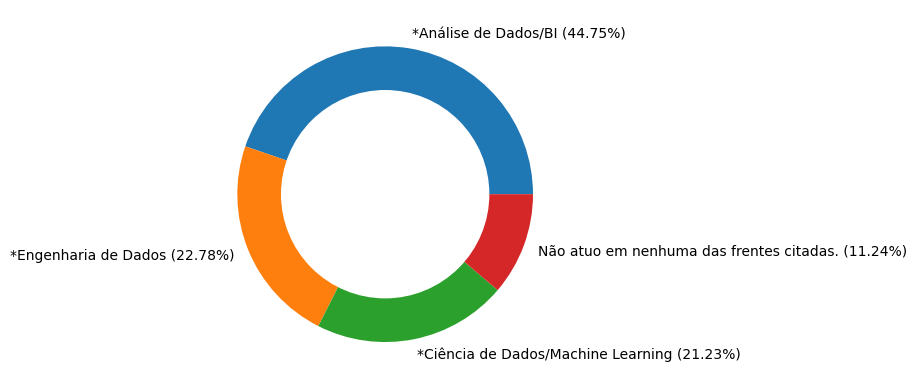

In [8]:
#Mesmo que esse não seja seu cargo formal, você considera que sua atuação no dia a dia, reflete alguma das opções listadas abaixo?'
df_P4_a = parte_4.filter(like='P4_a ',axis=1).copy()
df_P4_a['contador'] = 1
df_P4_a['P4_a '] = df_P4_a['P4_a '].str.split(':',expand=True)[0]

df_P4_a = df_P4_a.groupby('P4_a ',as_index=False).agg({'contador':'sum'}).sort_values(by='contador',ascending=False)

df_P4_a['percentual'] = (df_P4_a['contador'] / df_P4_a['contador'].sum()) * 100

#Paliativo para os labels

df_P4_a['label'] = df_P4_a['P4_a '] + ' (' +  df_P4_a['percentual'].round(2).astype('str') + '%' + ')'


#Donut Chart
plt_centro = plt.Circle((0,0), 0.7,color='white')
plt.pie(df_P4_a['percentual'],labels=df_P4_a['label'])
p = plt.gcf()
p.gca().add_artist(plt_centro)

plt.show()



Daqueles que responderam a pesquisa, percebemos que maior parte trabalha com análise de dados ou BI, e a minoria, trabalha com ciência de dados *per se*.

Não desanime! Essa relação é facilmente explicável com a piramide de prioridades de dados:

![hierarchy of needs](https://hackernoon.imgix.net/hn-images/1*7IMev5xslc9FLxr9hHhpFw.png)

Analistas de dados/BI trazem muito valor com análises relativamente menos complexas. O trabalho do cientista de dados requer empresas com maior maturidade de dados. 

### Agora, qual stack os profissionáis de dados mais usam no seu dia a dia?

[Text(0, 0, '1245'),
 Text(0, 0, '1136'),
 Text(0, 0, '325'),
 Text(0, 0, '113'),
 Text(0, 0, '56'),
 Text(0, 0, '26'),
 Text(0, 0, '22'),
 Text(0, 0, '19'),
 Text(0, 0, '13'),
 Text(0, 0, '12'),
 Text(0, 0, '8'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1')]

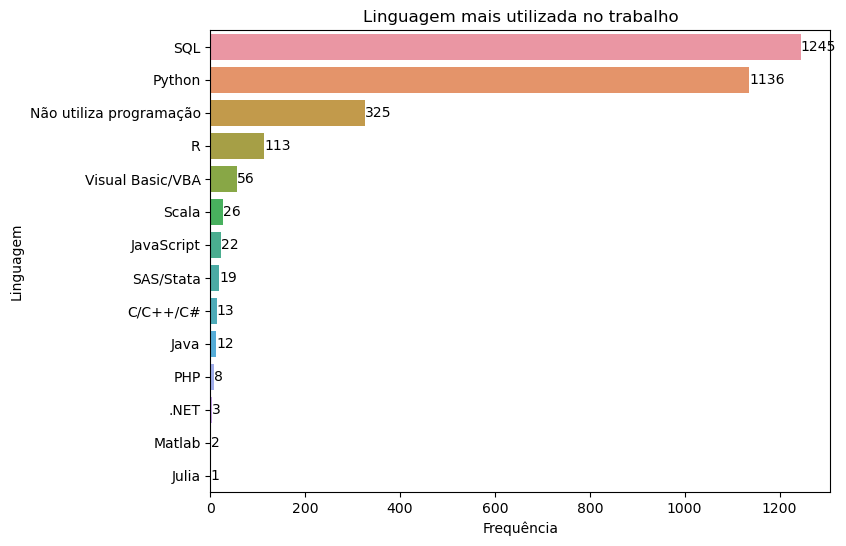

In [9]:
#Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?
df_P4_e = parte_4.filter(like='P4_e ',axis=1).copy() #Pega somente a coluna de nome 'P4_e'
df_P4_e.loc[:,'contador'] = 1 #Define uma nova coluna somente o número 1 

#Agrupamento para gerar o ranking das linguagens mais utilizadas
df_P4_e = df_P4_e.groupby('P4_e ',as_index=False).agg({'contador':'sum'}).sort_values(by='contador',ascending=False)

#Gráfico de barra com o ranking por linguagem
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(df_P4_e,y='P4_e ',x='contador')
plt.title('Linguagem mais utilizada no trabalho')
plt.xlabel('Frequência')
plt.ylabel('Linguagem')

ax.bar_label(ax.containers[0])

No geral, a linguagem **mais** utilizada pelas pessoas que trabalham no mercado de dados são: **SQL** e **Python**, surpreendentemente, 325 pessoas responderam que **não utilizam nenhuma linguagem**.

E como esse comportamendo se reflete nas profissões?

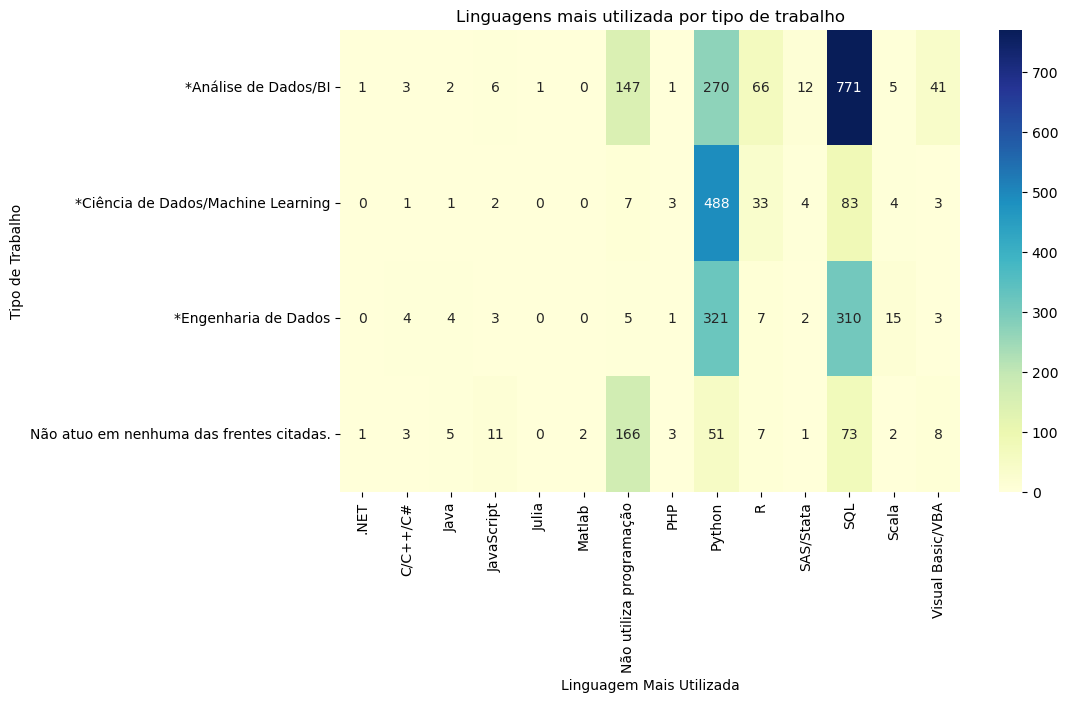

In [20]:
df_P4_e_pivot = parte_4[['P4_a ','P4_e ']]
df_P4_e_pivot = df_P4_e_pivot.dropna()
df_P4_e_pivot['P4_a '] = parte_4['P4_a '].str.split(':',expand=True)[0]
df_P4_e_pivot = df_P4_e_pivot.pivot_table(index='P4_a ',columns='P4_e ',aggfunc='size', fill_value=0)
df_P4_e_pivot

plt.figure(figsize=(10, 6))
sns.heatmap(df_P4_e_pivot, cmap='YlGnBu', annot=True, fmt='d')  # cmap define a paleta de cores
plt.title('Linguagens mais utilizada por tipo de trabalho')
plt.xlabel('Linguagem Mais Utilizada')
plt.ylabel('Tipo de Trabalho')
plt.show()

In [21]:
df_P4_e_pivot.sum(axis=1)

P4_a 
*Análise de Dados/BI                        1326
*Ciência de Dados/Machine Learning           629
*Engenharia de Dados                         675
Não atuo em nenhuma das frentes citadas.     333
dtype: int64

No caso dos analistas de dados, a linguaguem mais utilizada é **SQL**, representando **58%** daqueles que responderam.

Cienistas e engenheiros de dados relataram que a linguagem que mais utilizam é **Python**, representando respectivamente **77%** e **48%** dos entrevistados dessas profissões.

Nota-se que a pergunta respondida anteriormente foi: qual a linguagem você **mais** usa. Abaixo, temos um gráfico acumulado que representa quais são as linguagens utilizadas no dia a dia por profissão. Ou seja, o entrevistado poderia responder todas as linguagens que costuma utlizar, e não apenas uma. 

In [11]:
lista_colunas = list(dados.filter(like = 'P4_d', axis = 1).copy().columns) 
lista_colunas.append("('P4_a ', 'Mesmo que esse não seja seu cargo formal, você considera que sua atuação no dia a dia, reflete alguma das opções listadas abaixo?')")

df_P4_d = dados[lista_colunas].copy()

for i in df_P4_d.columns:
    df_P4_d.rename(columns={i:extract_text_between_quotes(i)[1]},inplace=True)


df_P4_d = df_P4_d.drop(columns=['Quais das linguagens listadas abaixo você utiliza no trabalho?'])
df_P4_d['Mesmo que esse não seja seu cargo formal, você considera que sua atuação no dia a dia, reflete alguma das opções listadas abaixo?'
] = df_P4_d['Mesmo que esse não seja seu cargo formal, você considera que sua atuação no dia a dia, reflete alguma das opções listadas abaixo?'
].str.split(':',expand=True)[0]
df_P4_d = df_P4_d.dropna()

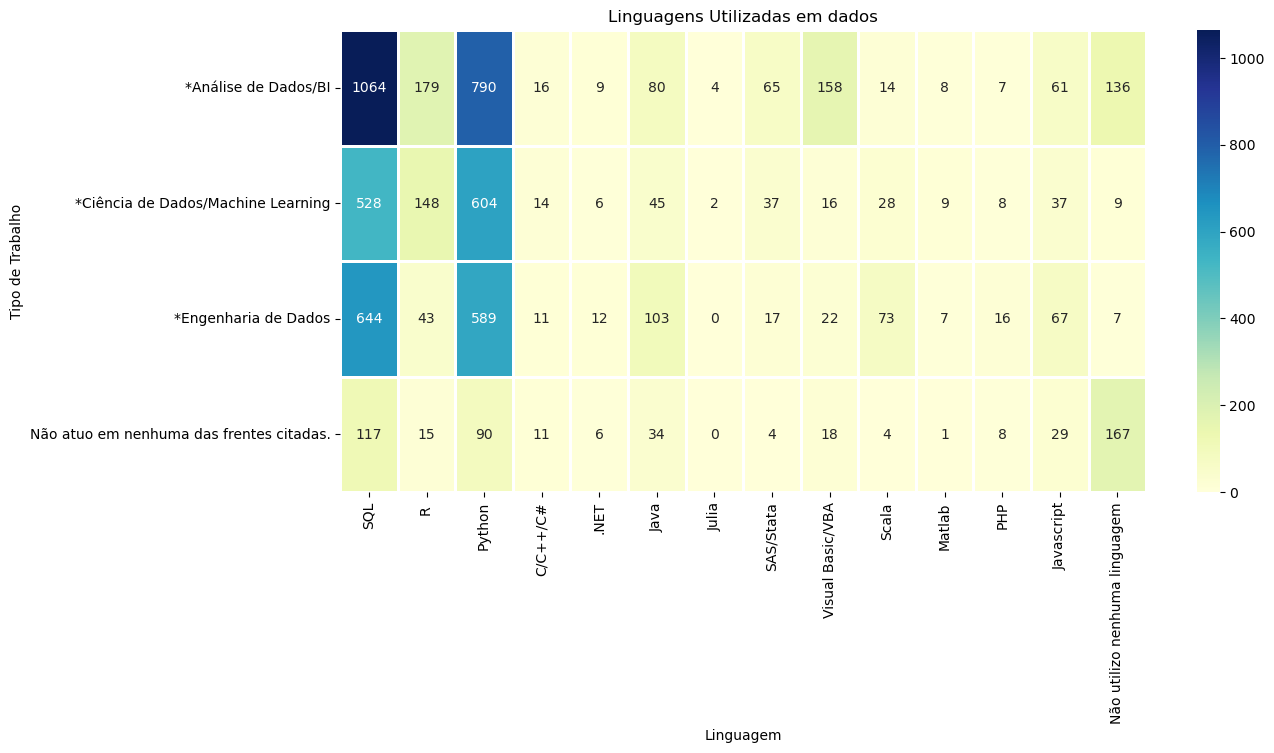

In [12]:


df_P4_d_pivot = df_P4_d.groupby('Mesmo que esse não seja seu cargo formal, você considera que sua atuação no dia a dia, reflete alguma das opções listadas abaixo?'
).sum()


plt.figure(figsize=(13, 6))
heatmap = sns.heatmap(df_P4_d_pivot, cmap='YlGnBu', annot=True,linewidths=2,fmt='.0f')  # cmap define a paleta de cores

plt.title('Linguagens Utilizadas em dados')
plt.xlabel('Linguagem')
plt.ylabel('Tipo de Trabalho')
plt.show()

### Qual a função de um cientista de dados? 

Em varias ocasiões, os cientistas de dados terão que atacar diversas frentes de um projeto, nem todas as empresas possuem estruturas consolidadas e requerem que o cientista trabalhe desde o ETL, ao EDA, criação do algoritimo e produtização.

No gráfico abaixo, vemos de forma generalizada o que entrevistados responderam que costumam fazer no seu dia a dia:

- Algoritimos de ML : Desenvolver os algorimos, criar experimentos, testar hipóteses e realizar predições. Ter contato com a área de negócios e gerar os artefatos que serão implementados.

- Produtização de modelos: Coletar os artefatos gerados e colocá-los em produção, servindos os modelos através de apis, cuidando de pipelines CI/CD e envolvimento com a cultura de MLOPs

- Limpeza e ETL: Responsável por tratar os dados utlizados na modelagem, pode ter envolvimento com DAGs e pipelines de dados

- Visualização e BI: Construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.


	> Essa pergunta segue o mesmo modelo da anterior onde o entrevistado pode responde mais de uma função.

[Text(0, 0, '1477'), Text(0, 0, '503'), Text(0, 0, '340'), Text(0, 0, '178')]

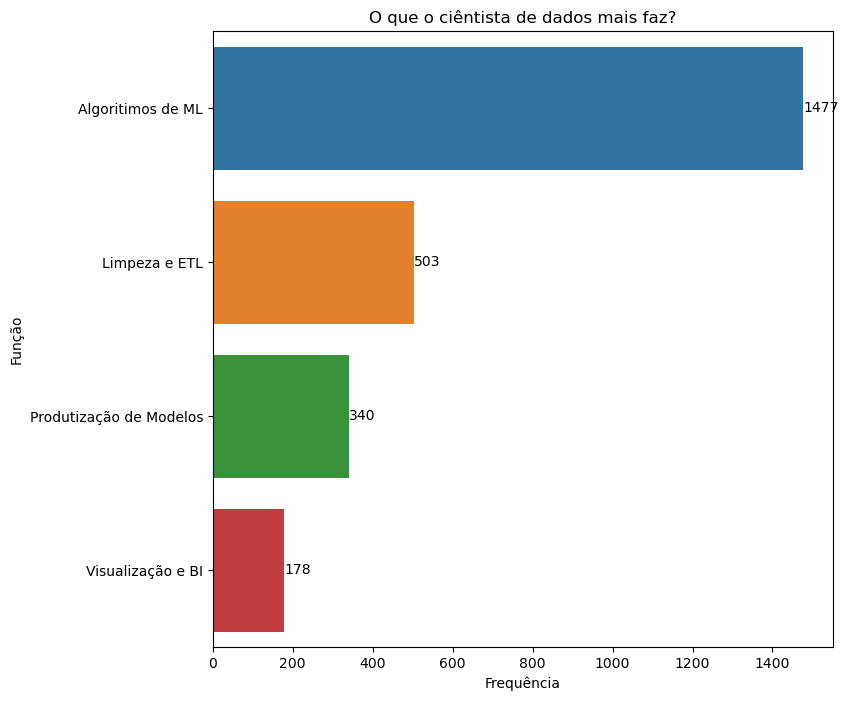

In [30]:
df_P8_a = parte_8.filter(like='P8_a_',axis=1).copy()

mascara_nomes_colunas = {col: extract_text_between_quotes(col)[1] for col in df_P8_a.columns}
df_P8_a.rename(columns=mascara_nomes_colunas, inplace=True)


df_P8_a_rename_dict = {'Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio.':'Algoritimos de ML',
'Sou responsável pela coleta e limpeza dos dados que uso para análise e modelagem.':'Limpeza e ETL',
'Sou responsável por entrar em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.':'Algoritimos de ML',
'Desenvolvo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).':'Algoritimos de ML',
'Sou responsável por colocar modelos em produção, criar os pipelines de dados, APIs de consumo e monitoramento':'Produtização de Modelos',
'Cuido da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário':'Algoritimos de ML',
'Realizo construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc':'Visualização e BI',
'Utilizo ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises estatísticas e ajustar modelos.Crio e dou manutenção em ETLs, DAGs e automações de pipelines de dados.':'Algoritimos de ML',
'Crio e dou manutenção em ETLs, DAGs e automações de pipelines de dados.':'Limpeza e ETL',
'Crio e gerencio soluções de Feature Store e cultura de MLOps.':'Produtização de Modelos',
'Sou responsável por criar e manter a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)':'Produtização de Modelos',
'Sou responsável por colocar modelos em produção, criar os pipelines de dados, APIs de consumo e monitoramento.':'Produtização de Modelos',
'Cuido da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.':'Algoritimos de ML'}

df_P8_a = df_P8_a.rename(columns=df_P8_a_rename_dict)

df_P8_a = df_P8_a.transpose().apply(lambda col: col.sum(), axis=1)

df_P8_a = df_P8_a.reset_index()
df_P8_a.columns = ['Desc', 'Soma']
df_P8_a = df_P8_a.sort_values('Soma',ascending=False)

df_P8_a_top = df_P8_a.groupby('Desc',as_index=False).sum().sort_values('Soma',ascending=False)

df_P8_a_top


#Gráfico de barra
fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(df_P8_a_top,y='Desc',x='Soma')
plt.title('O que o ciêntista de dados mais faz?')
plt.xlabel('Frequência')
plt.ylabel('Função')
ax.bar_label(ax.containers[0])


### Quais técnicas mais utilizadas em ciência de dados?

Em alguns momentos podemos nos deixar levar pela idealização excessiva da profissão. Qual, de fato, são as técnicas mais usadas em ciência de dados?

[Text(0, 0, '572'),
 Text(0, 0, '471'),
 Text(0, 0, '391'),
 Text(0, 0, '334'),
 Text(0, 0, '267'),
 Text(0, 0, '172'),
 Text(0, 0, '136'),
 Text(0, 0, '125'),
 Text(0, 0, '88'),
 Text(0, 0, '76'),
 Text(0, 0, '36')]

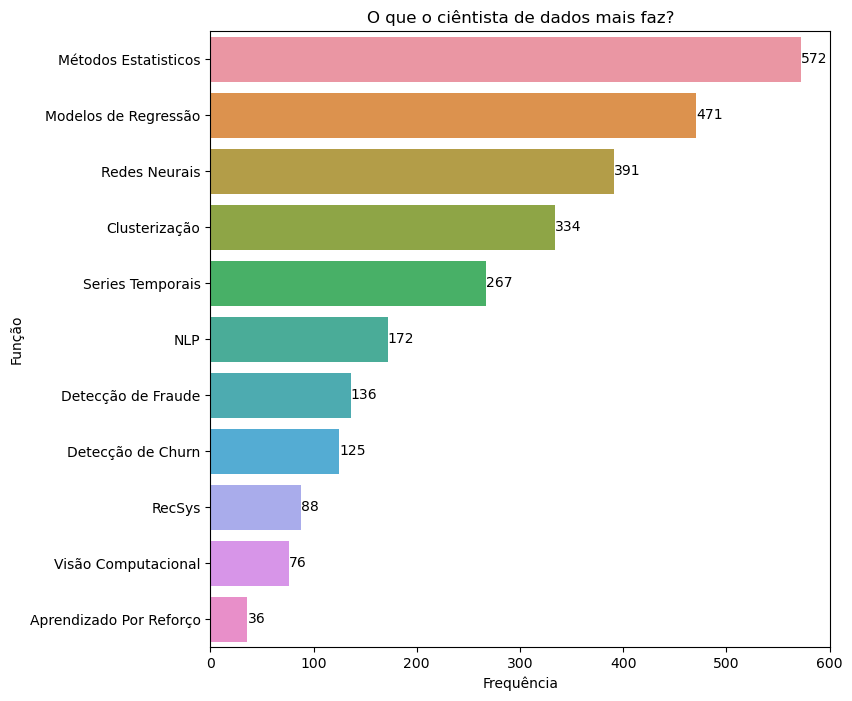

In [31]:
df_P8_b = parte_8.filter(like='P8_b_',axis=1).copy()

mascara_nomes_colunas_b = {col: extract_text_between_quotes(col)[1] for col in df_P8_b.columns}
df_P8_b.rename(columns=mascara_nomes_colunas_b, inplace=True)

df_P8_b_rename_dict = {'Utilizo modelos de regressão (linear, logística, GLM)':'Modelos de Regressão',
'Utilizo redes neurais ou modelos baseados em árvore para criar modelos de classificação':'Redes Neurais',
'Desenvolvo sistemas de recomendação (RecSys)':'RecSys',
'Utilizo métodos estatísticos Bayesianos para analisar dados':'Métodos Estatisticos',
'Utilizo técnicas de NLP (Natural Language Processing) para análisar dados não-estruturados':'NLP',
'Utilizo métodos estatísticos clássicos (Testes de hipótese, análise multivariada, sobrevivência, dados longitudinais, inferência estatistica) para analisar dados':'Métodos Estatisticos',
'Utilizo cadeias de Markov ou HMM':'Métodos Estatisticos',
'Desenvolvo técnicas de Clusterização (K-means, Spectral, DBScan etc)':'Clusterização',
'Realizo previsões através de modelos de Séries Temporais (Time Series)':'Series Temporais',
'Utilizo modelos de Reinforcement Learning (aprendizado por reforço)':'Aprendizado Por Reforço',
'Utilizo modelos de Machine Learning para detecção de fraude':'Detecção de Fraude',
'Utilizo métodos de Visão Computacional':'Visão Computacional',
'Utilizo modelos de Detecção de Churn':'Detecção de Churn'}

df_P8_b = df_P8_b.rename(columns=df_P8_b_rename_dict)

df_P8_b = df_P8_b.transpose().apply(lambda col: col.sum(), axis=1)

df_P8_b = df_P8_b.reset_index()
df_P8_b.columns = ['Desc', 'Soma']
df_P8_b = df_P8_b.sort_values('Soma',ascending=False)

df_P8_b_top = df_P8_b.groupby('Desc',as_index=False).sum().sort_values('Soma',ascending=False)

df_P8_b_top

#Gráfico de barra
fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(df_P8_b_top,y='Desc',x='Soma')
plt.title('O que o ciêntista de dados mais faz?')
plt.xlabel('Frequência')
plt.ylabel('Função')
ax.bar_label(ax.containers[0])




Métodos estatisticas lideram o ranking conforme o esperado. Como citado anteriormente, técnicas mais complexas exigem ambientes de dados mais maduros.
